# Labels mapping characteristics and filtering

Depending on the quality of your segmentation, it will be interesting to filter your labels based on different characteristics of your dataset, like size, intensity, etc.

In this case, the result using stardist and a generalistic ML confidence-based pixel classifier generates an over-segmentation. This issue will be easily solved by setting a mean intensity threshold to remove the low-intensity labels representing negative signal cells.

## Setting up your requirements

We will use 'NumPy' to handle our arrays, 'napari' to visualize our data, 'Zarr' to load and save our results.

Also, we will use two functions from 'scikit-image', 'measure_regionprops_table' to list the properties of our labels based on the raw data, and 'util_map_array' to extract the labels that we want. 'pandas' is going to be used to handle the extracted statistics.

Last, we use 'matplotlib' to plot some graphs that will help us decide the limits to select the labels.

In [1]:
import numpy as np
import napari
import pandas
import zarr
import matplotlib.pyplot as plt
import SimpleITK as sitk
import tifffile as tf
#from skimage.measure import regionprops_table
#from skimage.util import map_array

### Loading your data
Here you have to indicate where your files are stored, you can use zarr format that will result in smaller and manageable files, but you can use tif files in the same way.

In [2]:
# load raw data

#image = zarr.load(r"D:\EHG\Gonad\14-12-59_EH4020_XY_RHS_TestisMeso_PCW61_5-PLVAP_6-Pax8_7-Sox9_12x_166z_STITCHED.zarr")
image = tf.imread(r"E:\KI67 Test with Edwin\Imported_image.aivia.tif")

# Load the segmented image

#labels = sitk.ReadImage(r"D:\EHG\results\New folder\14-43-57_testis_3483_5plvap_6sma_7sox9_12x_1x_2u_lr_blaze_mosaic2_SOX9_Want_labels2.ome.tif", sitk.sitkInt32)
#labels = zarr.load(r"D:\EHG\results\New folder\14-43-57_testis_3483_5plvap_6sma_7sox9_12x_1x_2u_lr_blaze_mosaic2_SOX9_Want_labels2.ome.tif2.zarr")
labels = tf.imread(r"E:\KI67 Test with Edwin\KI67-AfterTrackMate.ome.tif")

#intensity_labels = zarr.load(r"F:\stardist_seg\lab_intensity.zarr")

### Inspect your data using Napari (Optional)

We are going to use Napari to visualize our data

In [7]:
viewer = napari.Viewer()

C:\Users\Linux\.conda\envs\bio11\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


Then, we add the datasets to Napari

In [8]:
viewer.add_image(image)
viewer.add_labels(labels)
#viewer.add_labels(labels)

<Labels layer 'labels' at 0x214d2e62040>

2022-05-23 15:10:05.005 | INFO     | napari_assistant._gui._category_widget:call_op:129 - exclude_labels_on_edges (clesperanto)(..., )
2022-05-23 15:10:08.307 | ERROR    | napari_assistant._gui._category_widget:gui_function:337 - An error has been caught in function 'gui_function', process 'MainProcess' (22392), thread 'MainThread' (5572):
Traceback (most recent call last):

  File "C:\Users\Linux\.conda\envs\bio11\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x00000212185C1F50, file "C:\Users\Linux\.conda\envs\bio11\lib\site-packages\ipykernel_launcher.py",...
           └ <function _run_code at 0x00000212186BA4C0>

  File "C:\Users\Linux\.conda\envs\bio11\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
         │   

In [ ]:
viewer.layers['labels'].scale = [3.69, 1, 1]
viewer.layers['image'].scale = [3.69, 1, 1]
#viewer.layers['intensity_labels'].scale = [3.69, 1, 1]


In [ ]:
label = sitk.Cast(labels,sitk.sitkFloat32)

### Extracting the labels features

Using the 'regioprops_table' function, we can extract some label characteristics that will help us to decide which threshold can be applied for or case. 


In [3]:
from napari_simpleitk_image_processing import label_statistics
import pandas as pd
import time

start_time = time.time()
    
# get dictionary of measurements 
props = label_statistics(image, labels, None, True, True, True, True, True, True)
        
# read out arrays of values
content = pd.DataFrame(props)

max_vector = content['maximum']
mean_vector = content['mean']
min_vector = content['minimum']
feret_vector = content['feret_diameter']
pixel_vector = content['number_of_pixels']
sum_vector = content['sum']
rad_vector = content['equivalent_spherical_radius']
per_vector = content['perimeter']
flat_vector = content['flatness']
rou_vector = content['roundness']
        
print("Determining label statistics using simpleitk took " + str(time.time() - start_time) + " s")

Determining label statistics using simpleitk took 42.40045475959778 s


Then, we can use pandas to structure the results array.

In [4]:
content.to_csv(r"E:\KI67 Test with Edwin\labels.csv")

We can retrieve the different vectors of interest to be evaluated.

Then, we can get a look of our labels using matplotlib to plot the frequency histograms.

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

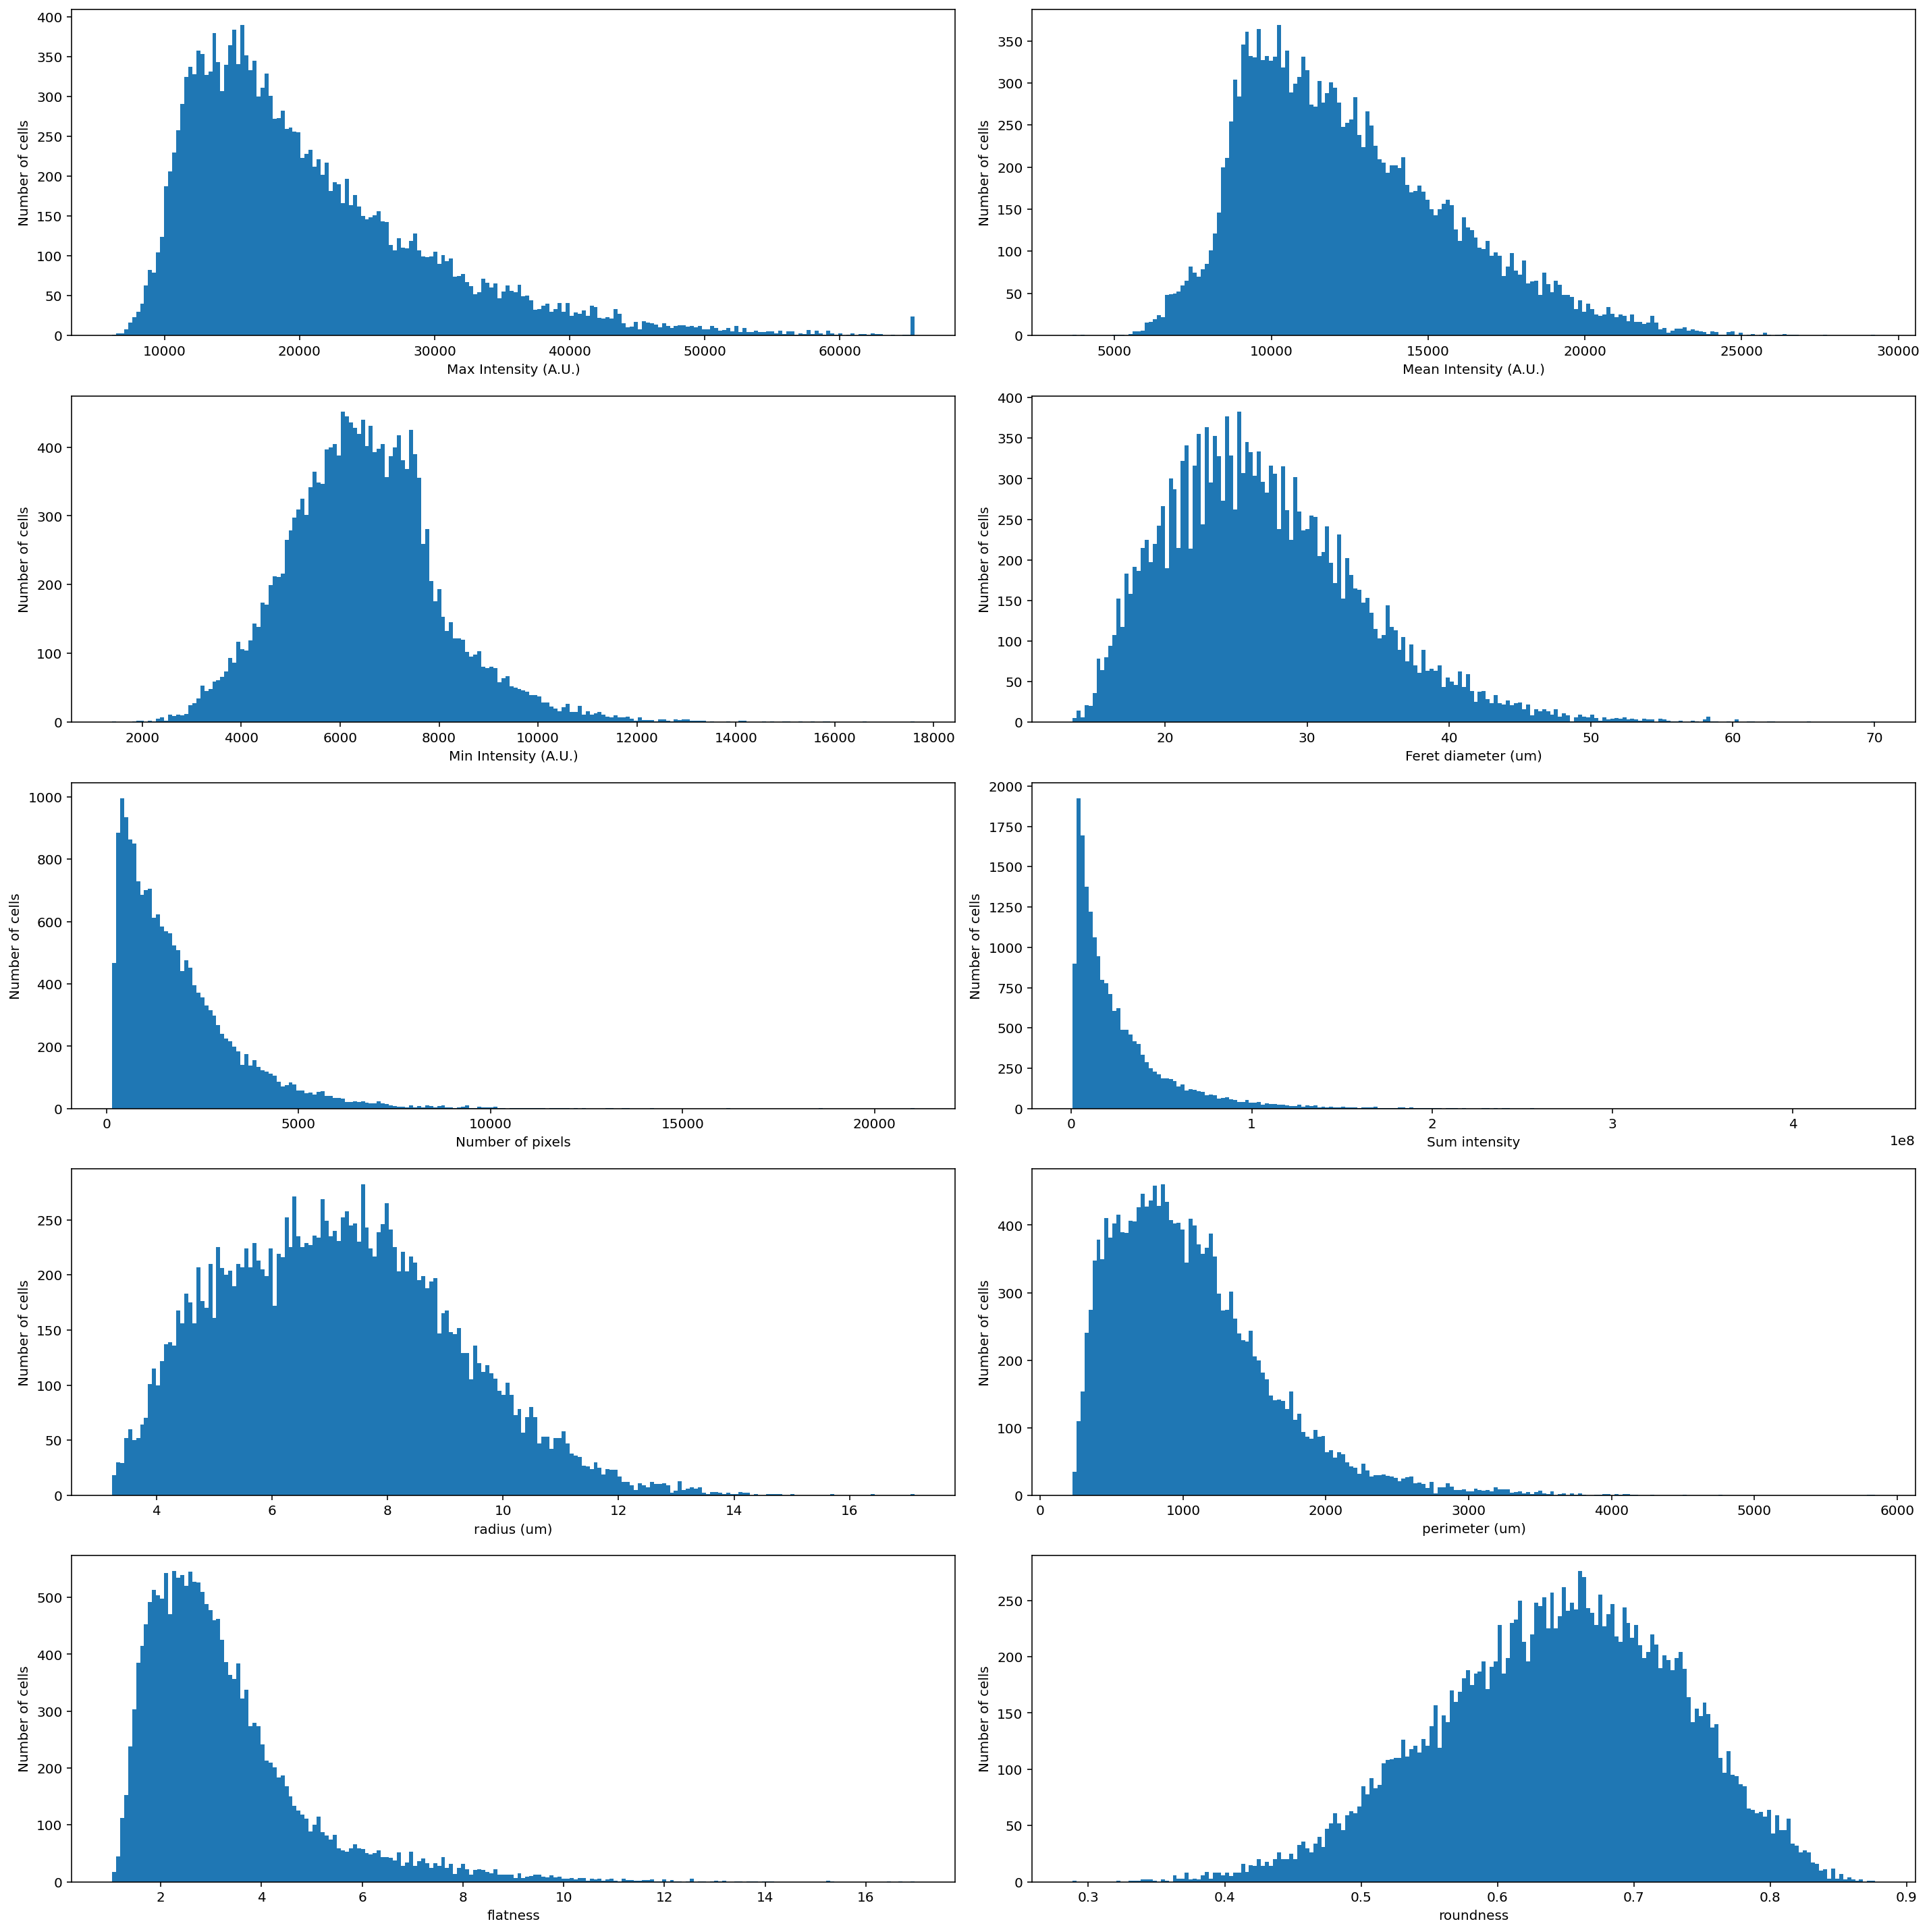

In [6]:
fig, axes = plt.subplots(5, 2, figsize=(20,20))
ax = axes.ravel()


ax[0].hist(max_vector, bins=200)
ax[0].set_ylabel('Number of cells')
ax[0].set_xlabel('Max Intensity (A.U.)')

ax[1].hist(mean_vector, bins=200)
ax[1].set_ylabel('Number of cells')
ax[1].set_xlabel('Mean Intensity (A.U.)')

ax[2].hist(min_vector, bins=200)
ax[2].set_ylabel('Number of cells')
ax[2].set_xlabel('Min Intensity (A.U.)')

ax[3].hist(feret_vector, bins=200)
ax[3].set_ylabel('Number of cells')
ax[3].set_xlabel('Feret diameter (um)') 

ax[4].hist(pixel_vector, bins=200)
ax[4].set_ylabel('Number of cells')
ax[4].set_xlabel('Number of pixels')

ax[5].hist(sum_vector, bins=200)
ax[5].set_ylabel('Number of cells')
ax[5].set_xlabel('Sum intensity')

ax[6].hist(rad_vector, bins=200)
ax[6].set_ylabel('Number of cells')
ax[6].set_xlabel('radius (um)')

ax[7].hist(per_vector, bins=200)
ax[7].set_ylabel('Number of cells')
ax[7].set_xlabel('perimeter (um)')

ax[8].hist(flat_vector, bins=200)
ax[8].set_ylabel('Number of cells')
ax[8].set_xlabel('flatness')

ax[9].hist(rou_vector, bins=200)
ax[9].set_ylabel('Number of cells')
ax[9].set_xlabel('roundness')

fig.tight_layout()

From those histograms we can see that there are two populations of cells, this allow us to think that cells that have a instensity of 4000 or higher ca be considerated positives.

### Selecting labels above a given intensity threshold

To generate the labels image of the nuclei with an intensity higher than 4000 we can use the 'map_array' funtion from 'scikit-image' mapping the *product* of the boolean array with the labels.

In [ ]:
content['equivalent_spherical_radius']


In [ ]:
max_vec = content['maximum']
mean_vec = content['mean']
min_vec = content['minimum']
feret_vec = content['feret_diameter']
pixel_vec = content['number_of_pixels']
sum_vec = content['sum']
rad_vec = content['equivalent_spherical_radius']
per_vec = content['perimeter']
flat_vec = content['flatness']
rou_vec = content['roundness']    

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10,10))
ax = axes.ravel()


ax[0].hist(max_vec, bins=300)
ax[0].set_ylabel('Number of cells')
ax[0].set_xlabel('Max Intensity (A.U.)')

ax[1].hist(mean_vec, bins=100)
ax[1].set_ylabel('Number of cells')
ax[1].set_xlabel('Mean Intensity (A.U.)')

ax[2].hist(min_vec, bins=100)
ax[2].set_ylabel('Number of cells')
ax[2].set_xlabel('Min Intensity (A.U.)')

ax[3].hist(feret_vec, bins=100)
ax[3].set_ylabel('Number of cells')
ax[3].set_xlabel('Feret diameter (um)') 

ax[4].hist(pixel_vec, bins=300)
ax[4].set_ylabel('Number of cells')
ax[4].set_xlabel('Number of pixels')

ax[5].hist(sum_vec, bins=100)
ax[5].set_ylabel('Number of cells')
ax[5].set_xlabel('Sum intensity')

ax[6].hist(rad_vec, bins=100)
ax[6].set_ylabel('Number of cells')
ax[6].set_xlabel('radius (um)')

ax[7].hist(per_vec, bins=100)
ax[7].set_ylabel('Number of cells')
ax[7].set_xlabel('perimeter (um)')

ax[8].hist(flat_vec, bins=100)
ax[8].set_ylabel('Number of cells')
ax[8].set_xlabel('flatness')

ax[9].hist(rou_vec, bins=100)
ax[9].set_ylabel('Number of cells')
ax[9].set_xlabel('roundness')

fig.tight_layout()

In [ ]:
from skimage.util import map_array

intensity_labels  = map_array(
    labels,
    label_ids := np.asarray(content['label']),
    label_ids * np.asarray(content['equivalent_spherical_radius'] > 3),
)

Then we can add our new labels to Napari

In [ ]:
viewer.add_labels(intensity_labels)

### Saving the new labels

We can save our new generated labels as *zarr* file using the 'convenience.save' function

In [ ]:
zarr.convenience.save(r"D:\EHG\Explants\COUPTFII\EH3930_SAG7_Explant-3_5-COUPTFII.zarr", intensity_labels)

### Getting the properties of the new set of labels
Finally, we can extract the properties of our new set of labels and format them with pandas

In [ ]:
for i in range(0, 10):
    start_time = time.time()
    
    # get dictionary of measurements
    props_int = label_statistics(image, intensity_labels, None, True, True, True, True, True, True)
    
    # read out arrays of values
    content_int = pandas.DataFrame(props_int)
    
    max_vec = content_int['maximum']
    mean_vec = content_int['mean']
    min_vec = content_int['minimum']
    feret_vec = content_int['feret_diameter']
    pixel_vec = content_int['number_of_pixels']
    sum_vec = content_int['sum']
    rad_vec = content_int['equivalent_spherical_radius']
    per_vec = content_int['perimeter']
    flat_vec = content_int['flatness']
    rou_vec = content_int['roundness']    

print("Determining label statistics using simpleitk took " + str(time.time() - start_time) + " s")

In [ ]:
content_int.to_excel("D:\EHG\Explants\COUPTFII\EH3930_SAG7_Explant-3_5-COUPTFII.xlsx")

Here, we can see the final count of cells in the dataset

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10,10))
ax = axes.ravel()


ax[0].hist(max_vec, bins=100)
ax[0].set_ylabel('Number of cells')
ax[0].set_xlabel('Max Intensity (A.U.)')

ax[1].hist(mean_vec, bins=100)
ax[1].set_ylabel('Number of cells')
ax[1].set_xlabel('Mean Intensity (A.U.)')

ax[2].hist(min_vec, bins=100)
ax[2].set_ylabel('Number of cells')
ax[2].set_xlabel('Min Intensity (A.U.)')

ax[3].hist(feret_vec, bins=100)
ax[3].set_ylabel('Number of cells')
ax[3].set_xlabel('Feret diameter (um)') 

ax[4].hist(pixel_vec, bins=100)
ax[4].set_ylabel('Number of cells')
ax[4].set_xlabel('Number of pixels')

ax[5].hist(sum_vec, bins=100)
ax[5].set_ylabel('Number of cells')
ax[5].set_xlabel('Sum intensity')

ax[6].hist(rad_vec, bins=100)
ax[6].set_ylabel('Number of cells')
ax[6].set_xlabel('radius (um)')

ax[7].hist(per_vec, bins=100)
ax[7].set_ylabel('Number of cells')
ax[7].set_xlabel('perimeter (um)')

ax[8].hist(flat_vec, bins=100)
ax[8].set_ylabel('Number of cells')
ax[8].set_xlabel('flatness')

ax[9].hist(rou_vec, bins=100)
ax[9].set_ylabel('Number of cells')
ax[9].set_xlabel('roundness')

fig.tight_layout()

In [ ]:
int_labels = map_array(
    labels,
    label_ids := np.asarray(content_int['label']),
    label_ids * np.asarray(content_int['minimum'] > 1000),
)

In [ ]:
zarr.convenience.save(r"D:\EHG\Explants\COUPTFII\EH3930_SAG7_Explant-3_5-COUPTFII.zarr", int_labels)

In [ ]:
for i in range(0, 10):
    start_time = time.time()
    
    # get dictionary of measurements
    props2_int = label_statistics(image, int_labels, None, True, True, True, True, True, True)
    
    # read out arrays of values
    content_int = pandas.DataFrame(props2_int)
    
    max_vec = content_int['maximum']
    mean_vec = content_int['mean']
    min_vec = content_int['minimum']
    feret_vec = content_int['feret_diameter']
    pixel_vec = content_int['number_of_pixels']
    sum_vec = content_int['sum']
    rad_vec = content_int['equivalent_spherical_radius']
    per_vec = content_int['perimeter']
    flat_vec = content_int['flatness']
    rou_vec = content_int['roundness']    

print("Determining label statistics using simpleitk took " + str(time.time() - start_time) + " s")

In [ ]:
content_int

In [ ]:
!pip install napari-error-reporter